In [6]:
#!/usr/bin/env python

In [7]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [8]:
import wuml
import numpy as np
import torch
import torch.nn as nn

In [9]:
def costFunction(x, x̂, ẙ, y, ŷ, ind):	
#	x -> encoder -> x̂
#	x̂ -> encoder_linear_output -> ẙ	
#	x̂ -> decoder -> ŷ	
#	possible autoencoder objective λ could be 0
#	loss = (x - ŷ)ᒾ + λ * objective(ẙ, y)
#
#	This function can return 1 value or 3 values in a list
#	if return 1 value, just the loss
#	if return 3 values, [total_loss, reconstruction_loss, extra network from ẙ loss]
#
#	In this example, we perform both reconstruction and CE loss
#
	n  = x.shape[0]
	λ = 0.01
	relu = nn.ReLU()
	R = λ*torch.sum((x - ŷ) ** 2)/(32*n)	#scaled by batch size times data dimension
	R2 = torch.sum((ẙ - y) ** 2)/(n)
	R3 = torch.sum(relu((ŷ - 43)))	# if prediction above 43, its wrong
	R4 = torch.sum(relu((22 - ŷ)))	# if prediction below 43, its wrong
	R5 = (torch.sum(relu((ẙ - y)))/n)*(torch.sum(relu(37 - y))/n)
	loss = R + R2 + R3 + R4 + R5
	return [loss, R, R2]

Data

In [10]:
data = wuml.wData(xpath='./data/data_1_imputed.csv', batch_size=32, preprocess_data='center and scale',
					label_type='continuous', label_column_name='gestationAge',
					first_row_is_label=True)
[X_train, X_test, y_train, y_test] = wuml.split_training_test(data, test_percentage=0.2)

Objective 1

In [11]:
AE = wuml.autoencoder(30, X_train, default_depth=3, costFunction=costFunction, # costFunction and costFunction2 both works
						max_epoch=4000, encoder_output_weight_structure=[(200,'relu'),(200,'relu'),(1,'none')] ) 

Autoencoder Info:
	Learning rate: 0.001
	Max number of epochs: 4000
	Cost Function: <function costFunction at 0x7f265cd7b670>
	Train Loop Callback: None
	Cuda Available: True
	Encoder Structure
		Linear(in_features=32, out_features=31, bias=True) , relu
		Linear(in_features=31, out_features=30, bias=True) , none
	Encoder Extra Output weight Structure
		Linear(in_features=30, out_features=200, bias=True) , relu
		Linear(in_features=200, out_features=200, bias=True) , relu
		Linear(in_features=200, out_features=1, bias=True) , none
	Encoder Structure
		Linear(in_features=30, out_features=31, bias=True) , relu
		Linear(in_features=31, out_features=32, bias=True) , none



In [12]:
AE.fit()

	epoch: 4000, Total Loss/dimension: 14.9863, Reconstruct loss: 6.5694, Objective loss: 7.9405, Learning Rate: 0.00000002

This is the objective network output Training error

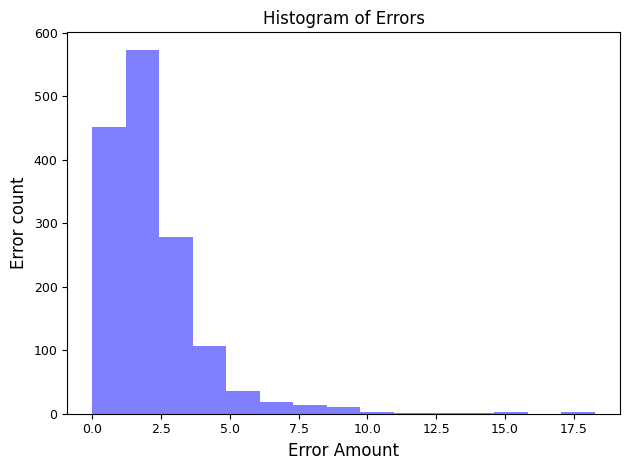

,y,ŷ,Δy
387,22.86,41.130001,18.270001
1246,23.29,41.130001,17.840001
1133,25.71,41.130001,15.420001
920,26.00,41.130001,15.130001
961,26.71,41.130001,14.420001
1047,28.86,41.130001,12.270001
444,30.00,41.130001,11.130001
477,30.43,41.130001,10.700001
906,31.14,41.130001,9.990001
681,31.14,41.130001,9.990001


In [13]:
ẙ = AE.objective_network(X_train)
res = wuml.output_regression_result(y_train, ẙ, sort_by='error')

This is the objective network output Test error

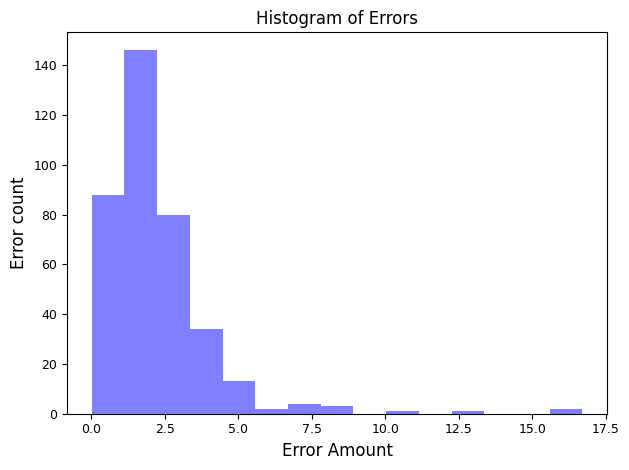

,y,ŷ,Δy
357,24.43,41.130001,16.700001
129,25.29,41.130001,15.840001
236,27.86,41.130001,13.270001
349,30.71,41.130001,10.420001
310,32.86,41.130001,8.270001
137,33.14,41.130001,7.990001
275,33.29,41.130001,7.840001
285,33.71,41.130001,7.420001
13,34.30,41.130001,6.830001
184,34.40,41.130001,6.730001


In [14]:
ẙ = AE.objective_network(X_test)
res = wuml.output_regression_result(y_test, ẙ, sort_by='error')